In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv", low_memory=False)

In [3]:
df.head(5)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
df.tail(5)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000,7.433000,46.311000,27.383000,1.041200e+00,1.652100e-01,130.970000,726.490000,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,0.000016,0.000056,0.000238,0.000130,2.418900e-08,3.346100e-09,0.000469,0.000016,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,0.000019,0.000057,0.000090,0.000053,1.650100e-07,1.101600e-08,0.000283,0.000091,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,0.544880,4.391600,18.988000,10.838000,7.171600e-01,1.016700e-01,38.984000,503.550000,MBA,0.25641
958523,bT3S2678,3246553,(2678 T-3),2678 T-3,NaN,NaN,N,N,18.060,NaN,...,1.102300,0.311700,1.284300,0.473610,1.626700e-01,2.487900e-02,5.523600,106.480000,MBA,0.26980


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [6]:
# Преобразование тип данных (уменьшаем memory usage)
df['neo'] = df['neo'].astype(bool)
df['pha'] = df['pha'].astype(bool)
df['class'] = df['class'].astype('category')

In [7]:
# Проверка дубликатов
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 45)


In [8]:
print(df.isnull().sum())

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    0
pha                    0
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [9]:
# Удаляем столбцы name, prefix
df = df.drop(['name', 'prefix'], axis=1)

In [10]:
df['neo'] = df['neo'].fillna(df['neo'].mode()[0])
df['pha'] = df['pha'].fillna(df['pha'].mode()[0])

In [11]:
# Замена нулевых значений средним и медианом
df['H'] = df['H'].fillna(df['H'].mean())
df['diameter'] = df['diameter'].fillna(df['diameter'].median())
df['albedo'] = df['albedo'].fillna(df['albedo'].mean())
df['diameter_sigma'] = df['diameter_sigma'].fillna(df['diameter_sigma'].median())
df['ma'] = df['ma'].fillna(df['ma'].mean())
df['ad'] = df['ad'].fillna(df['ad'].mean())
df['per'] = df['per'].fillna(df['per'].mean())
df['per_y'] = df['per_y'].fillna(df['per_y'].mean())
df['moid'] = df['moid'].fillna(df['moid'].mean())
df['rms'] = df['rms'].fillna(df['rms'].mean())
df['moid_ld'] = df['moid_ld'].fillna(df['moid_ld'].mode()[0])

In [12]:
# Другой способ замены
numeric_columns_with_zeros = ['sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per']

# Заменить нулевые значения средним значением для выбранных столбцов
df[numeric_columns_with_zeros] = df[numeric_columns_with_zeros].replace(0, np.nan)  # Заменить 0 на NaN
df[numeric_columns_with_zeros] = df[numeric_columns_with_zeros].fillna(df[numeric_columns_with_zeros].mean())  # Заполнить NaN средним значением

In [13]:
print(df.isnull().sum())

id                0
spkid             0
full_name         0
pdes              0
neo               0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
orbit_id          0
epoch             0
epoch_mjd         0
epoch_cal         0
equinox           0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64


In [14]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.585240e+05,9.585240e+05,9.585240e+05,9.585240e+05,9.585240e+05,9.585240e+05,9.585240e+05,9.585240e+05,9.585240e+05,958524.000000
mean,3.810114e+06,16.906411,4.190047,0.130627,0.352896,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.784546,3.593115,0.041419,0.299424,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.873451e+03,1.268836e+02,1.319452e+03,9.063315e+08,9.063310e+08,7.121834e+03,9.712420e+00,2.922197e+11,2.738762e+07,2.745697
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,3.972000,0.130627,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.475300e-07,6.141700e-06,3.667575e-05,5.829400e-05,2.608400e-05,2.373600e-08,2.800200e-09,1.127500e-04,1.821000e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.130627,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.321700e-07,8.832450e-06,6.833500e-05,1.077400e-04,5.053700e-05,4.485100e-08,4.744500e-09,2.306300e-04,3.607750e-05,0.566280
75%,3.752518e+06,17.700000,3.972000,0.130627,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,8.269400e-07,1.727400e-05,1.755700e-04,3.645000e-04,2.108500e-04,1.427600e-07,1.333400e-08,9.910925e-04,1.156800e-04,0.613923
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


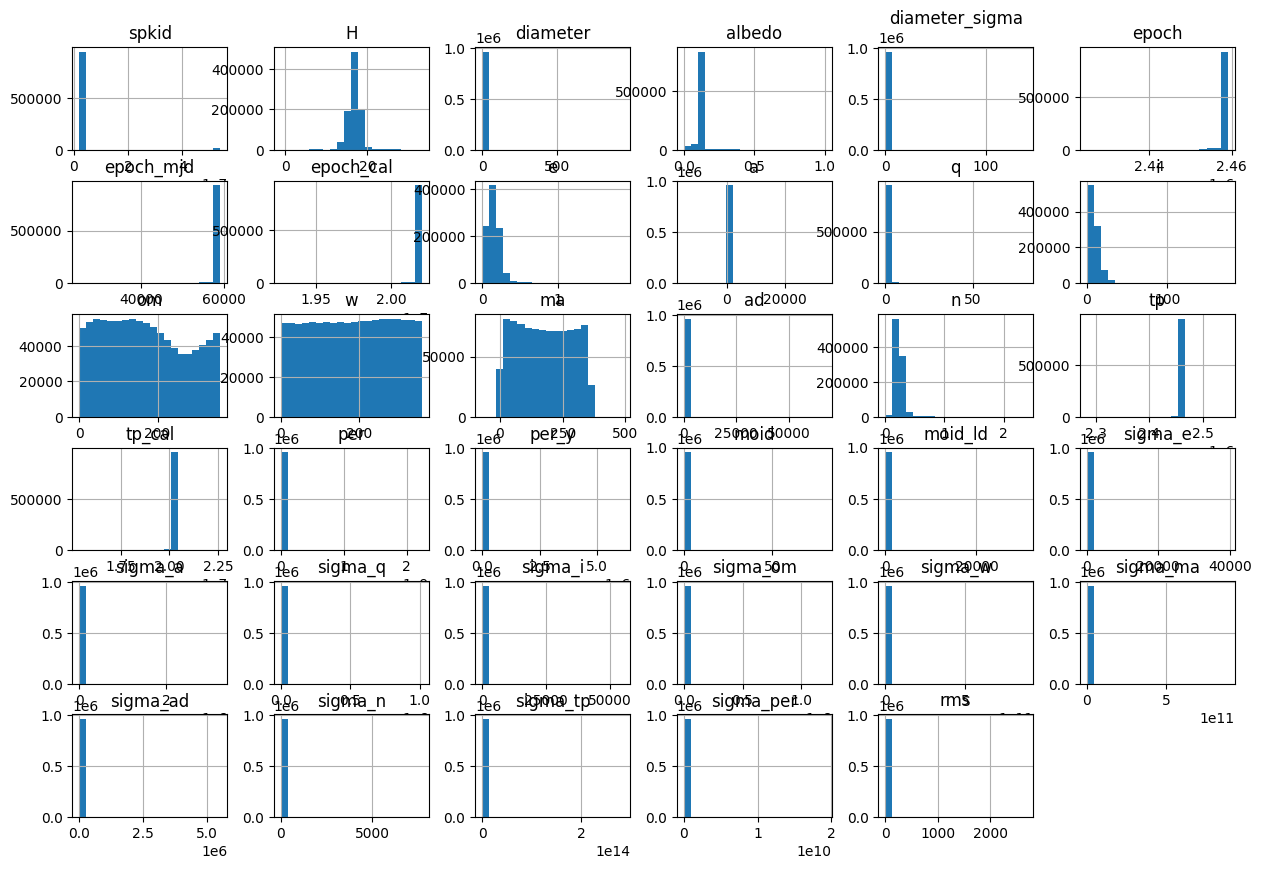

In [15]:
# Распределение числовых переменных
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [16]:
# Исследование категориальных переменных
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
for column in categorical_columns:
    print(f"Уникальные значения для {column}:\n{df[column].value_counts()}\n")

Уникальные значения для id:
id
a0000001    1
bK08RF2H    1
bK08RF1V    1
bK08RF1W    1
bK08RF1X    1
           ..
a0319513    1
a0319514    1
a0319515    1
a0319516    1
bT3S2678    1
Name: count, Length: 958524, dtype: int64

Уникальные значения для full_name:
full_name
     1 Ceres           1
       (2008 RH152)    1
       (2008 RV151)    1
       (2008 RW151)    1
       (2008 RX151)    1
                      ..
319513 (2006 QR148)    1
319514 (2006 QX156)    1
319515 (2006 QC163)    1
319516 (2006 QV169)    1
       (2678 T-3)      1
Name: count, Length: 958524, dtype: int64

Уникальные значения для pdes:
pdes
1             1
2008 RH152    1
2008 RV151    1
2008 RW151    1
2008 RX151    1
             ..
319513        1
319514        1
319515        1
319516        1
2678 T-3      1
Name: count, Length: 958524, dtype: int64

Уникальные значения для orbit_id:
orbit_id
1            50142
JPL 1        47494
JPL 2        34568
JPL 3        29931
12           29136
             ... 

In [17]:
# Корреляционный анализ
correlation_matrix = df.corr(numeric_only=True)

In [18]:
# Уменьшим объем данных до 10000 случайных строк
sample_size = 10000
df_sample = df.sample(sample_size, random_state=42)

In [19]:
# Установим стиль для графиков seaborn
sns.set(style="whitegrid")

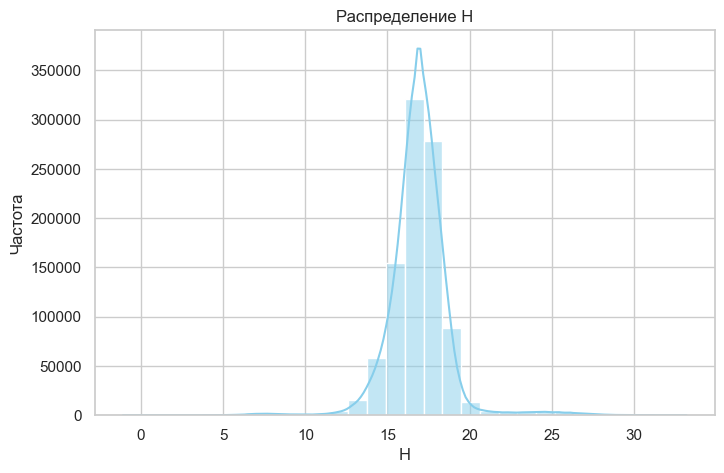

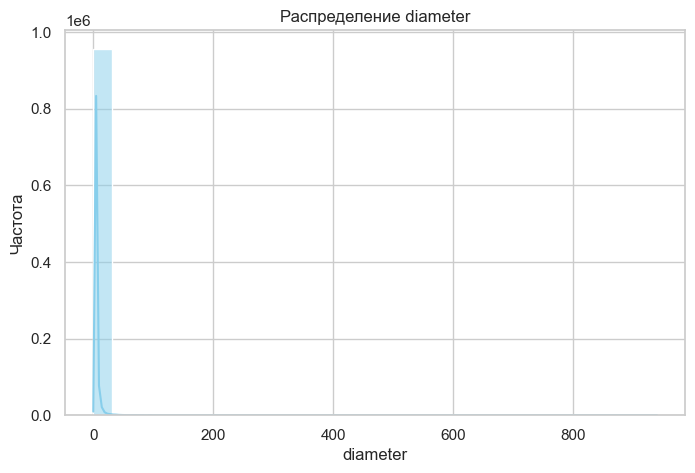

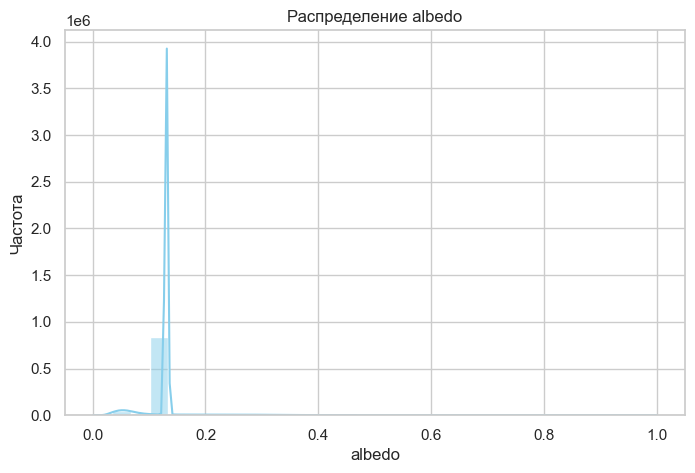

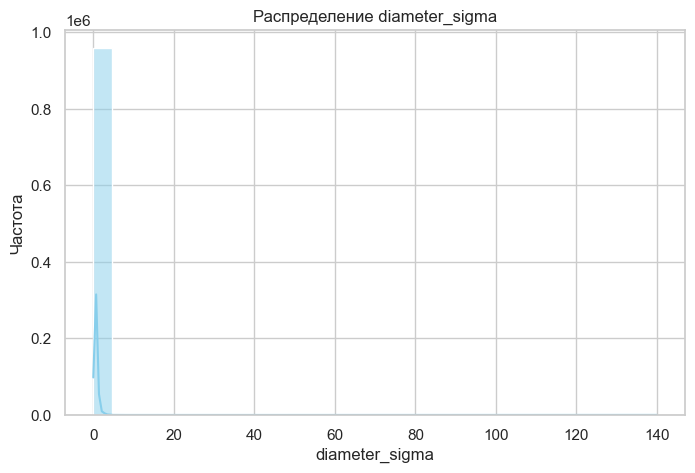

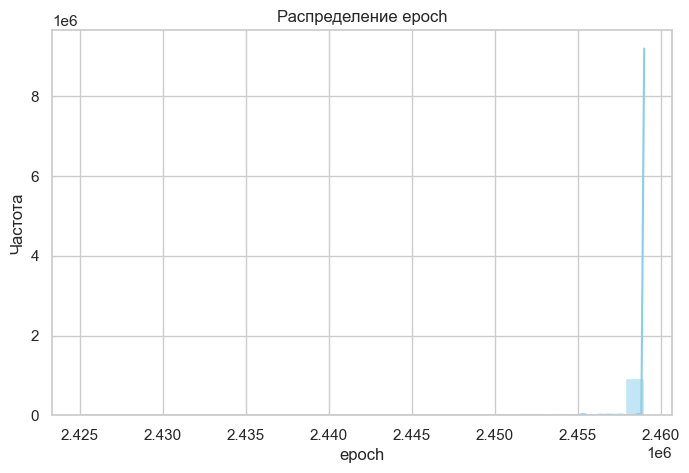

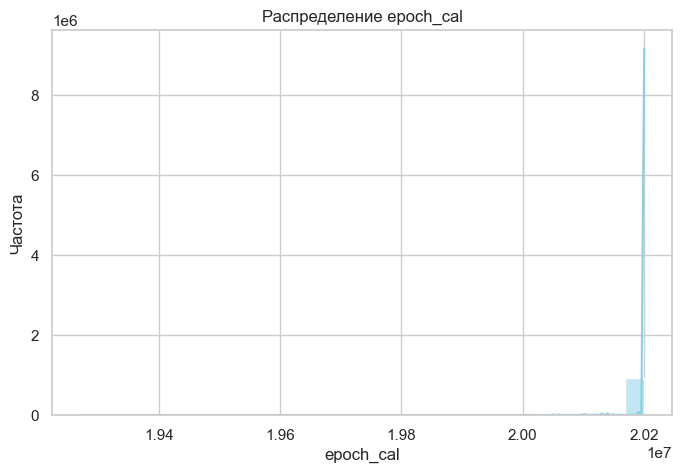

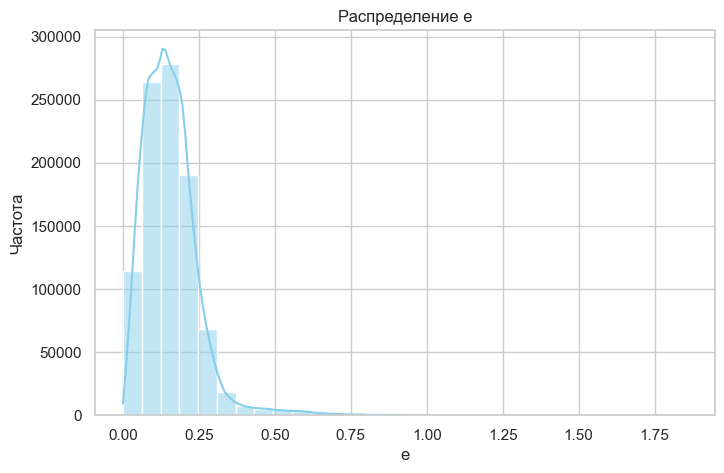

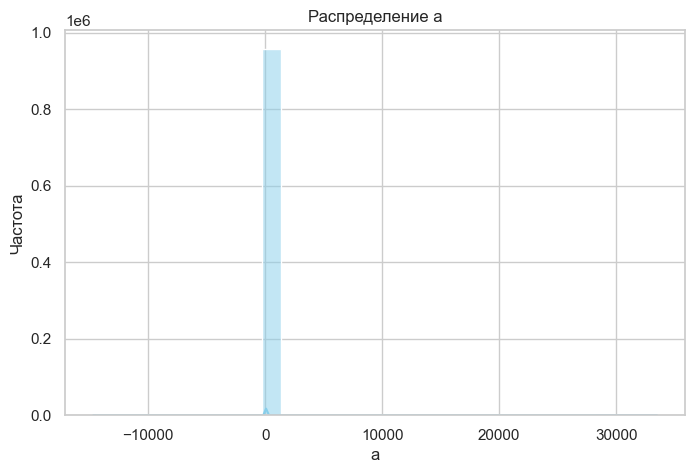

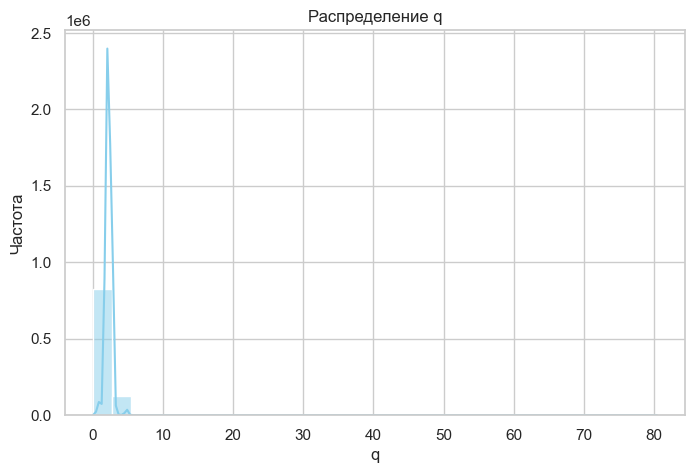

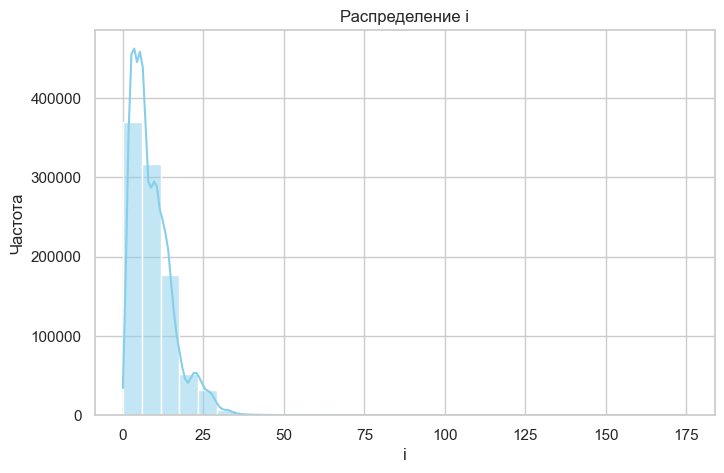

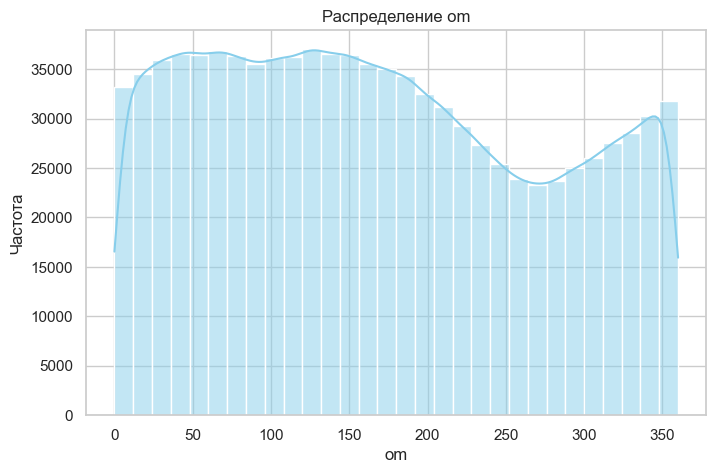

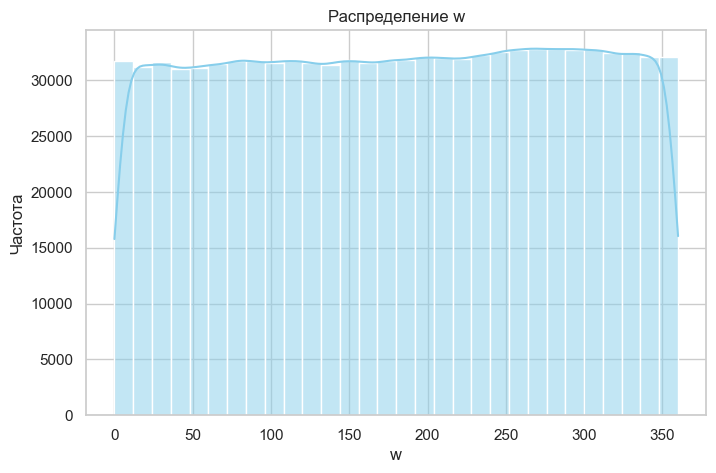

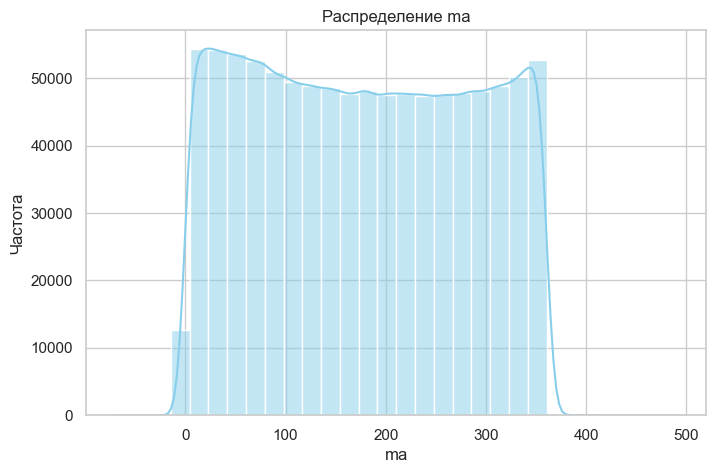

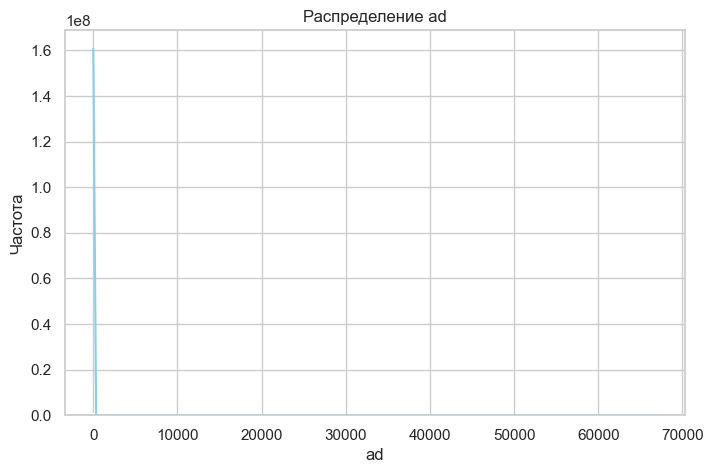

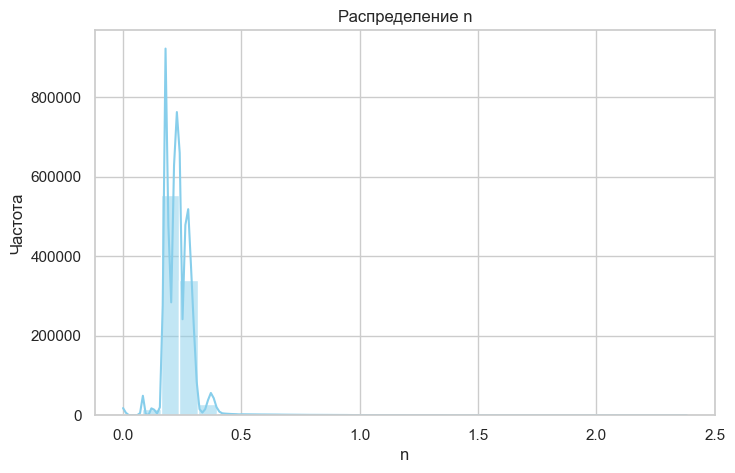

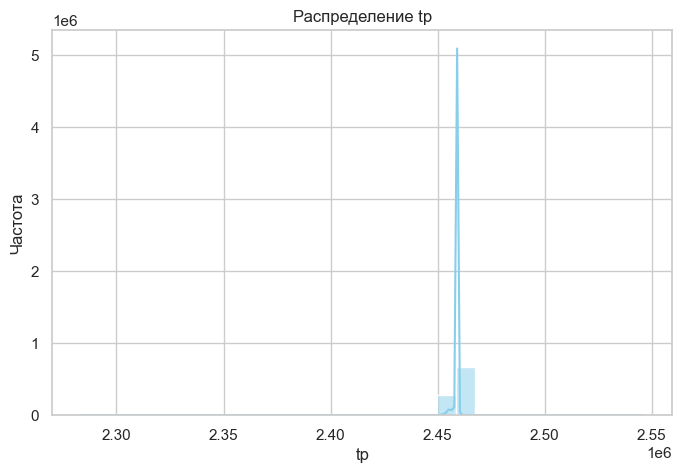

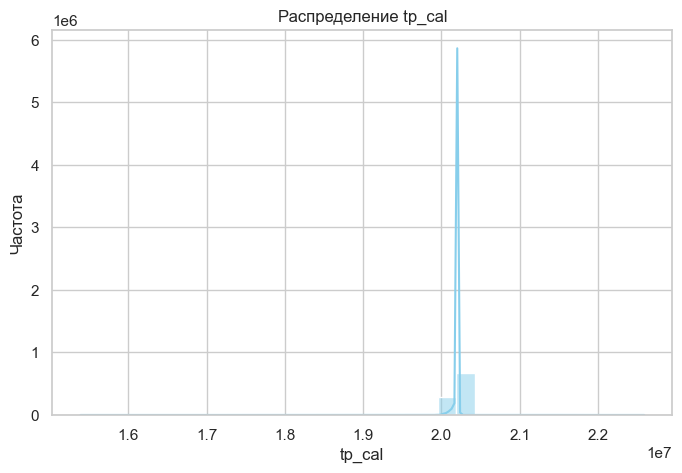

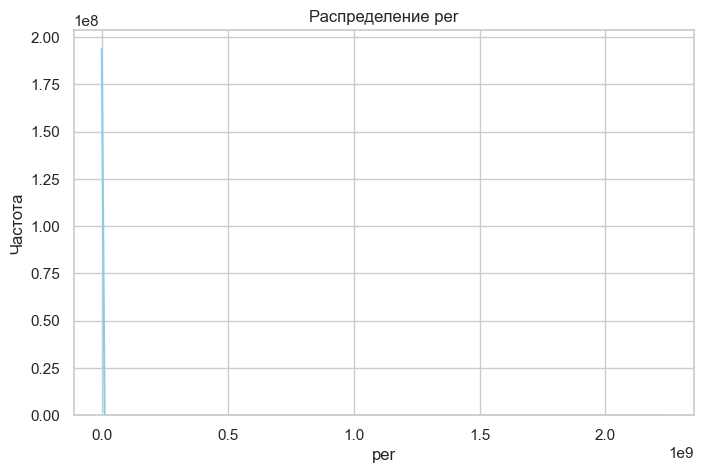

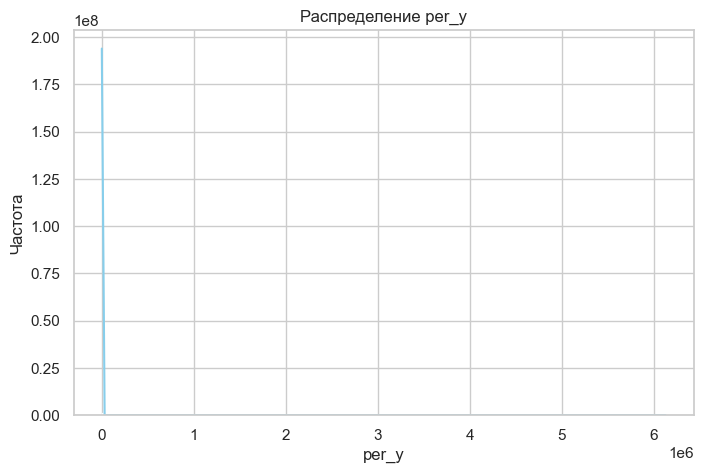

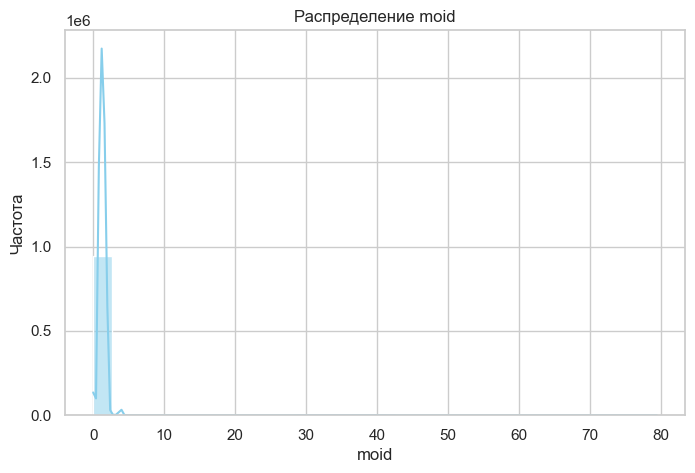

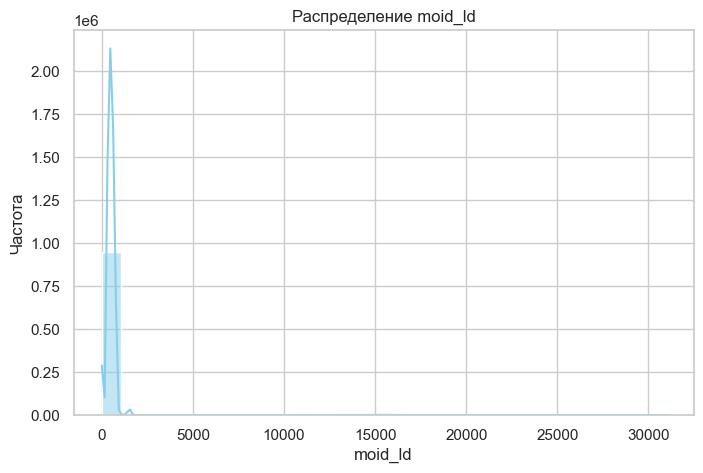

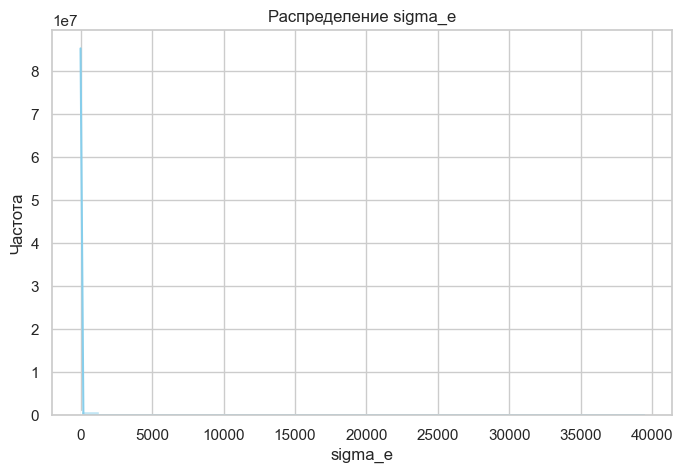

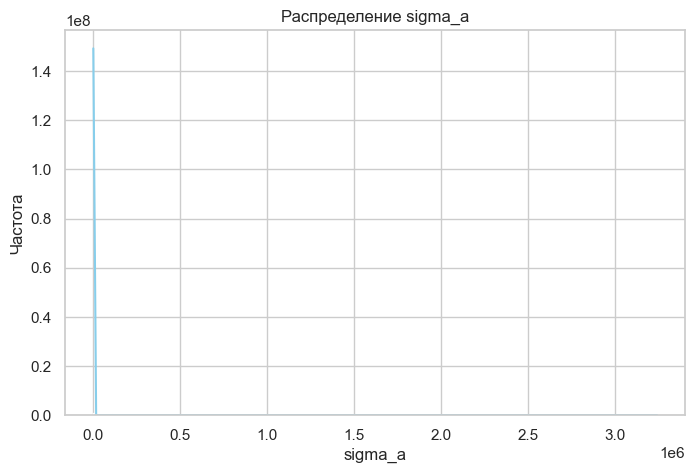

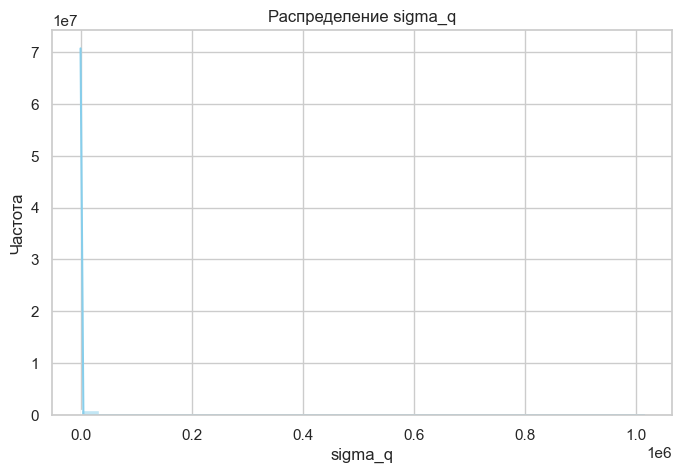

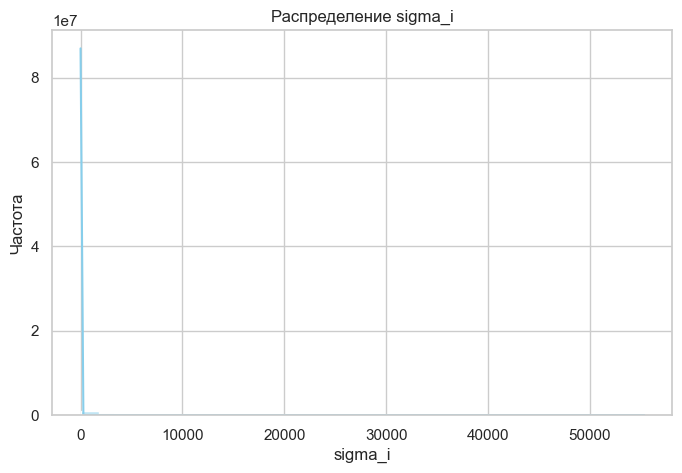

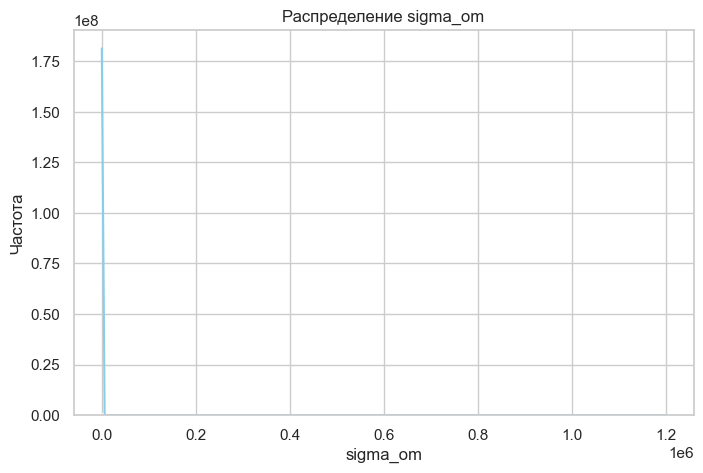

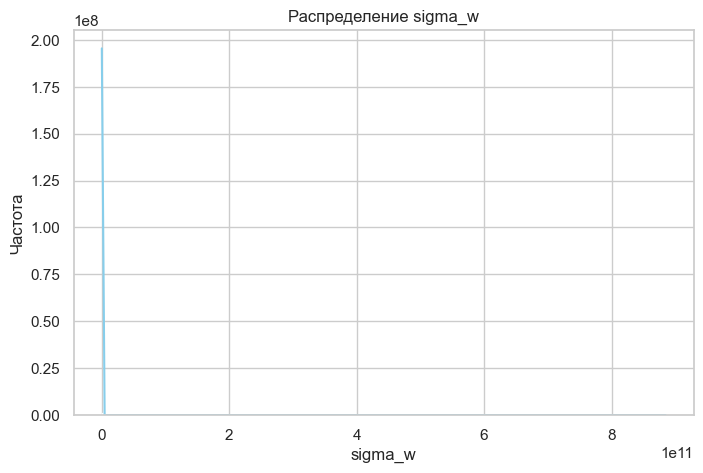

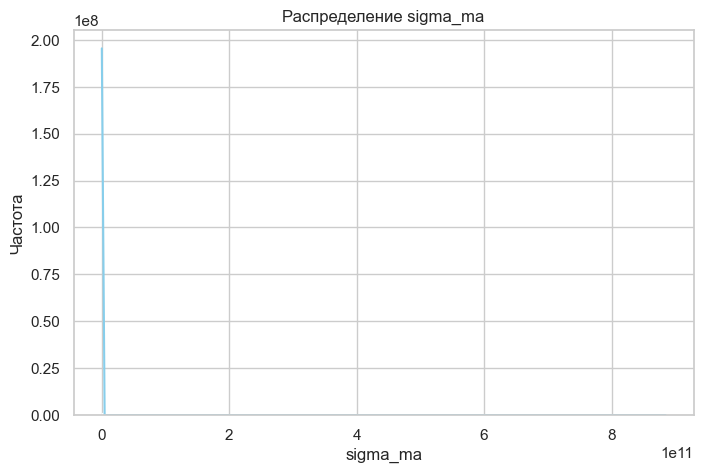

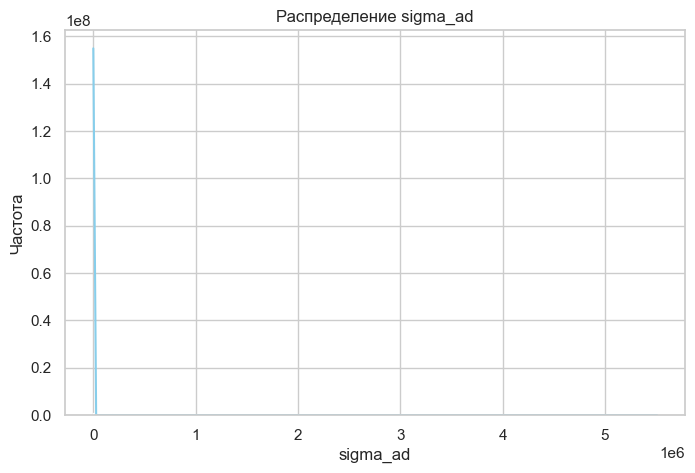

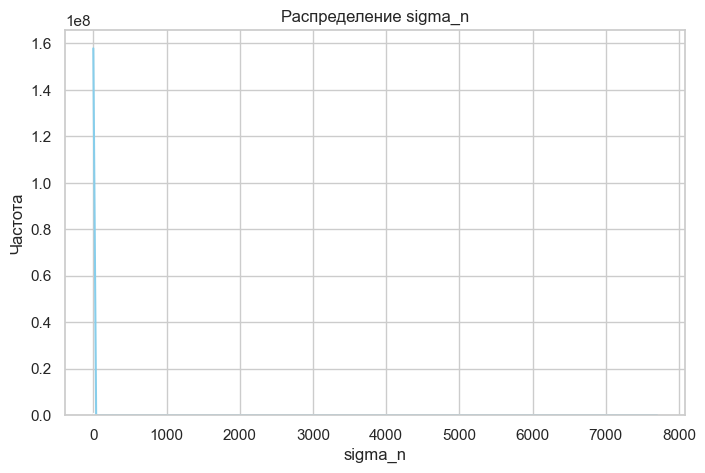

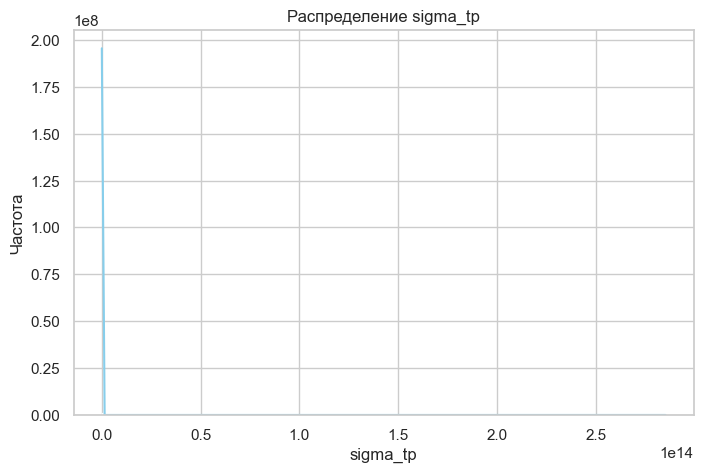

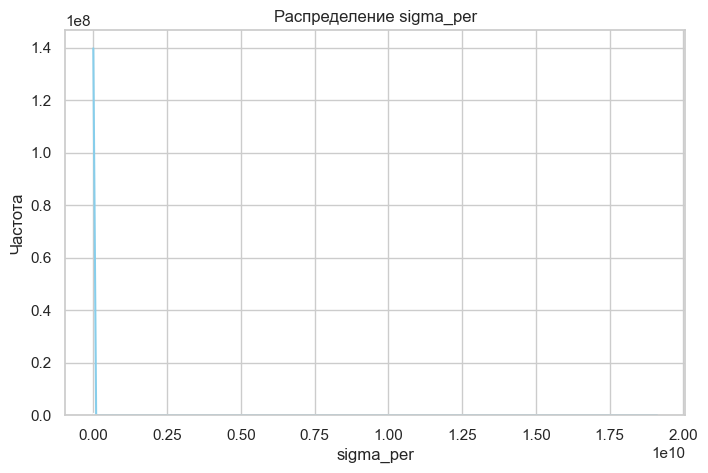

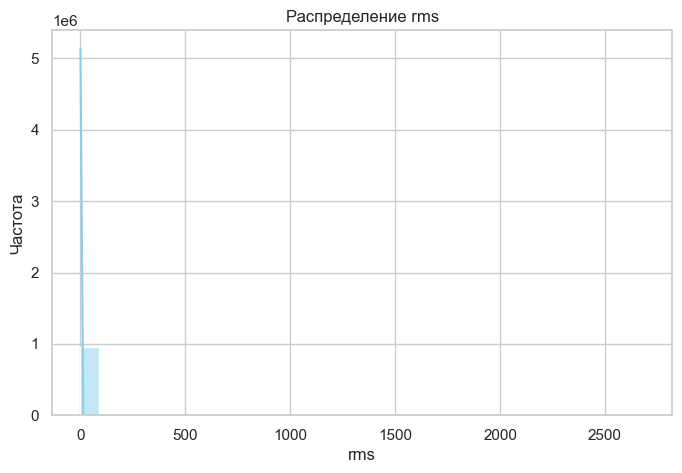

In [20]:
# Графики распределения
numeric_columns = df.select_dtypes(include=['float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')
    plt.title(f"Распределение {column}")
    plt.xlabel(column)
    plt.ylabel("Частота")
    plt.show()

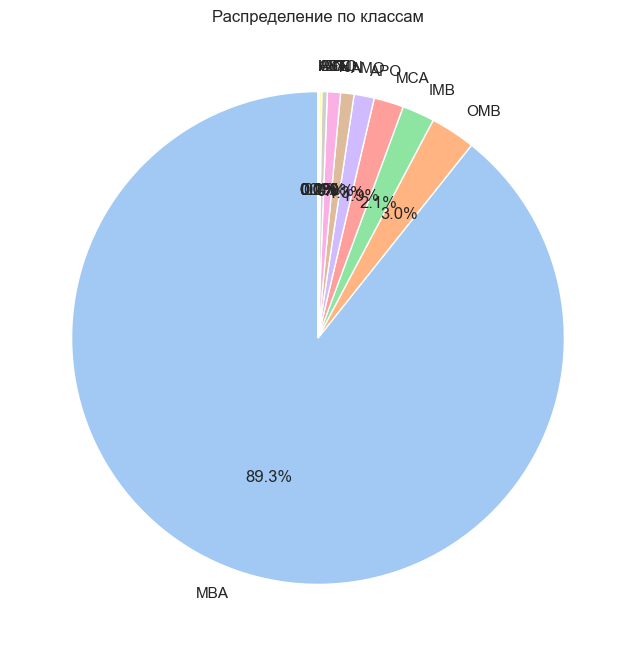

In [21]:
# Круговые диаграммы для категориальной переменной 'class'
plt.figure(figsize=(8, 8))
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.title("Распределение по классам")
plt.ylabel("")
plt.show()

In [54]:
#4 задание
# Гипотезы о том, различаются ли средние значения абсолютной звездной величины (H) 
# между двумя классами астероидов: NEO (Near-Earth Object) и MBA (Main Belt Asteroid).
from scipy.stats import ttest_ind

In [55]:
# Считываем данные из набора данных
df = pd.read_csv("dataset.csv", low_memory=False)

In [56]:
# Извлекаем данные NEO и MBA, удаляя пропущенные значения
neo_data = df[df['neo'].astype(str).str.upper() == 'Y']['H'].dropna()
mba_data = df[df['class'].astype(str).str.upper() == 'MBA']['H'].dropna()

In [57]:
# Расчет стандартного отклонения для каждой выборки
std_neo = neo_data.std()
std_mba = mba_data.std()

In [58]:
# Стандартное отклонение
print(f'Стандартное отклонение NEO: {std_neo}')
print(f'Стандартное отклонение MBA: {std_mba}')

Стандартное отклонение NEO: 2.984605839046868
Стандартное отклонение MBA: 1.2698963972352184


In [59]:
# Выполняем T-тест
t_stat, p_value = ttest_ind(neo_data, mba_data, equal_var=False)

In [60]:
# Выводим результаты
print(f'T-статистика: {t_stat}')
print(f'P-значение: {p_value}')

T-статистика: 307.16713843734266
P-значение: 0.0


In [61]:
# Определяем значимость
alpha = 0.05
if p_value < alpha:
    print('Отклоняем нулевую гипотезу: Абсолютная звездная величина NEO значительно отличается от MBA.')
else:
    print('Не отклоняем нулевую гипотезу: Нет значимого различия в абсолютной звездной величине между NEO и MBA.')

Отклоняем нулевую гипотезу: Абсолютная звездная величина NEO значительно отличается от MBA.


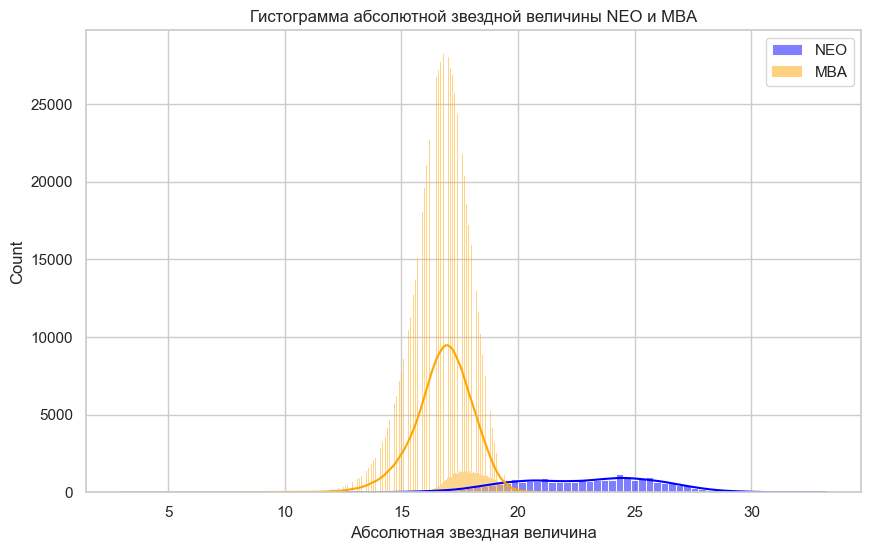

In [62]:
# Гистограммы для NEO и MBA
plt.figure(figsize=(10, 6))
sns.histplot(neo_data, label='NEO', color='blue', kde=True)
sns.histplot(mba_data, label='MBA', color='orange', kde=True)
plt.title('Гистограмма абсолютной звездной величины NEO и MBA')
plt.xlabel('Абсолютная звездная величина')
plt.legend()
plt.show()

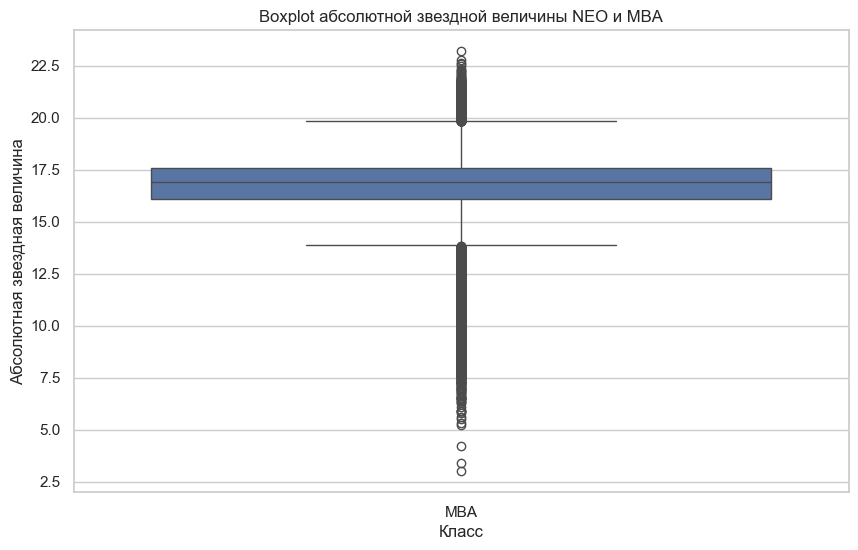

In [63]:
# Boxplot для NEO и MBA
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='H', data=df[df['class'].isin(['NEO', 'MBA'])])
plt.title('Boxplot абсолютной звездной величины NEO и MBA')
plt.xlabel('Класс')
plt.ylabel('Абсолютная звездная величина')
plt.show()

In [64]:
df = pd.read_csv("dataset.csv", low_memory=False)
df

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [65]:
#5
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


<Axes: xlabel='neo', ylabel='count'>

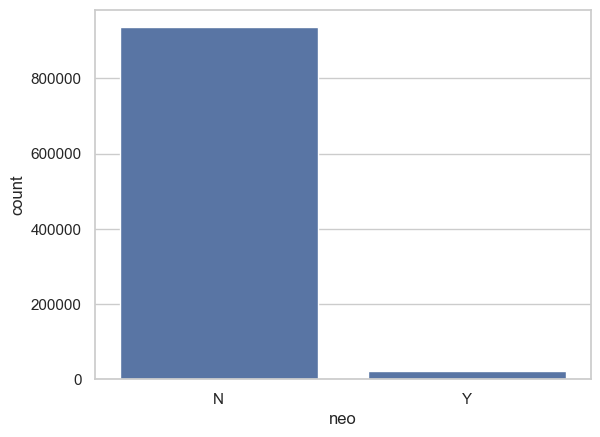

In [66]:
sns.countplot(x='neo', data=df)

<Axes: xlabel='pha', ylabel='count'>

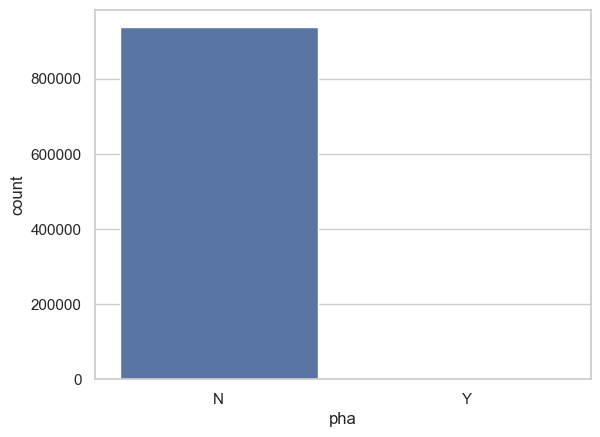

In [67]:
sns.countplot(x='pha', data=df)

In [68]:
df['pha'].replace({'Y': 1, 'N': 0}, inplace=True)

In [69]:
df['pha'].sum()

2066.0

In [70]:
df1 = df.dropna(subset=['diameter', 'moid_ld'], how='any')

In [71]:
# Определение признаков и целевой переменной
X = df1[["diameter", "moid_ld"]]
print(X)
Y = df1["pha"]
print(Y)

        diameter     moid_ld
0        939.400  620.640533
1        545.000  480.348639
2        246.596  402.514639
3        525.400  443.451432
4        106.699  426.433027
...          ...         ...
891841     2.696  534.225334
891971     2.917  559.171131
894103     3.271  453.612660
901055     3.009  592.822661
909489     1.600  451.534492

[136209 rows x 2 columns]
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
891841    0.0
891971    0.0
894103    0.0
901055    0.0
909489    0.0
Name: pha, Length: 136209, dtype: float64


In [72]:
model = LogisticRegression()
model.fit(X, Y)
status = model.predict(X)
accuracy = accuracy_score(Y, status)
slope = model.coef_

In [73]:
print("Coefficients:", slope)

Coefficients: [[ 0.10310605 -0.16524773]]


In [74]:
# Вывод точности
print("Accuracy:", accuracy)

Accuracy: 0.9992878590988848


In [75]:
conf_matrix = confusion_matrix(Y, status)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[135929     59]
 [    38    183]]


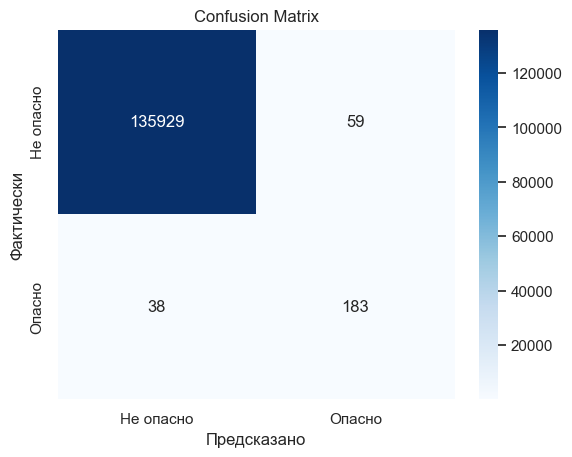

In [76]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Не опасно', 'Опасно'], yticklabels=['Не опасно', 'Опасно'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('Confusion Matrix')
plt.show()

In [77]:
# Вывод результатов
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.93%
